In [6]:
# #林家俊已经完成的数据预处理部分，不需要跑这个代码，但是需要下载群里的similar_3x_noise10.csv文件用于跑后面的代码
# #similar_3x_noise10这个文件是清洗完成之后用ai生成的的数据，因为原数据量太少，生成的是相似数据，ai自动添加误差,10的噪声
# def main():
#     import pandas as pd
#     import numpy as np
#     from sklearn.model_selection import train_test_split
#     from sklearn.preprocessing import StandardScaler

#     # 读取数据
#     data = pd.read_csv('Book1.csv')
    
#     print("原始数据形状:", data.shape)
#     print("原始数据列名:")
#     print(data.columns.tolist())

#     print("步骤1前数据信息:", type(data))
#     if data is not None:
#         print("数据形状:", data.shape)
#     else:
#         print("数据为None")
    
#     # 步骤1: 无效字段剔除
#     print("\n=== 步骤1: 无效字段剔除 ===")
#     # 检查是否存在 Unnamed: 19 和 Unnamed: 20 列，也就是检查空列
#     unnamed_cols = [col for col in data.columns if 'Unnamed' in col]
#     print(f"找到的Unnamed列: {unnamed_cols}")
    
#     # 删除缺失率>95%的无效字段，因为这些字段缺少太多无分析价值
#     cols_to_drop = []
#     for col in unnamed_cols:
#         if col in data.columns:
#             missing_rate = data[col].isnull().mean()
#             print(f"{col} 缺失率: {missing_rate:.2%}")
#             if missing_rate > 0.95:
#                 cols_to_drop.append(col)
    
#     if cols_to_drop:
#         data = data.drop(columns=cols_to_drop)
#         print(f"已删除列: {cols_to_drop}")
    
#     print("删除无效字段后数据形状:", data.shape)
    
#     # 步骤2: 数值型字段清洗
#     print("\n=== 步骤2: 数值型字段清洗 ===")
    
#     # 清洗 average_renewable_energy_usage_percent
#     if 'average_renewable_energy_usage_percent' in data.columns:
#         print("清洗 average_renewable_energy_usage_percent...")
#         # 移除 % 和 ~ 符号
#         data['average_renewable_energy_usage_percent'] = data['average_renewable_energy_usage_percent'].replace({'%': '', '~': ''}, regex=True)
#         # 转换为float
#         data['average_renewable_energy_usage_percent'] = pd.to_numeric(data['average_renewable_energy_usage_percent'], errors='coerce')
#         # 处理小数：若存在0-1区间的值，乘以100转换为百分比
#         mask = data['average_renewable_energy_usage_percent'] < 1
#         data.loc[mask, 'average_renewable_energy_usage_percent'] *= 100
#         print(f"完成清洗，当前数据类型: {data['average_renewable_energy_usage_percent'].dtype}")
    
#     # 清洗 internet_penetration_percent
#     if 'internet_penetration_percent' in data.columns:
#         print("清洗 internet_penetration_percent...")
#         # 移除 % 符号
#         data['internet_penetration_percent'] = data['internet_penetration_percent'].replace({'%': ''}, regex=True)
#         data['internet_penetration_percent'] = pd.to_numeric(data['internet_penetration_percent'], errors='coerce')
#         print(f"完成清洗，当前数据类型: {data['internet_penetration_percent'].dtype}")
    
#     # 清洗 power_capacity_MW_total
#     if 'power_capacity_MW_total' in data.columns:
#         print("清洗 power_capacity_MW_total...")
#         # 移除 ~, +, , 符号
#         data['power_capacity_MW_total'] = data['power_capacity_MW_total'].replace({'~': '', r'\+': '', ',': ''}, regex=True)
#         data['power_capacity_MW_total'] = pd.to_numeric(data['power_capacity_MW_total'], errors='coerce')
#         print(f"完成清洗，当前数据类型: {data['power_capacity_MW_total'].dtype}")
    
#     # 步骤3: 缺失值处理
#     print("\n=== 步骤3: 缺失值处理 ===")
#     print("各字段缺失情况:")
#     missing_info = data.isnull().sum()
#     missing_percent = (data.isnull().sum() / len(data) * 100).round(2)
#     missing_df = pd.DataFrame({
#         '缺失数量': missing_info,
#         '缺失率%': missing_percent
#     })
#     print(missing_df[missing_df['缺失数量'] > 0])
    
#     # 处理 tier_distribution（缺失率<10%用众数填充）
#     if 'tier_distribution' in data.columns:
#         missing_rate = data['tier_distribution'].isnull().mean()
#         print(f"\ntier_distribution 缺失率: {missing_rate:.2%}")
#         if missing_rate < 0.1 and missing_rate > 0:
#             mode_value = data['tier_distribution'].mode()[0]
#             data['tier_distribution'] = data['tier_distribution'].fillna(mode_value)
#             print(f"用众数 '{mode_value}' 填充了 tier_distribution 的缺失值")
    
#     # 处理 green_dc_initiatives_description（缺失26条，如果不作为核心特征可删除）
#     if 'green_dc_initiatives_description' in data.columns:
#         missing_count = data['green_dc_initiatives_description'].isnull().sum()
#         print(f"\ngreen_dc_initiatives_description 缺失: {missing_count} 条")
#         # 这里我们先保留，后续根据分析决定是否删除
    
#     # 步骤4: 分类变量编码
#     print("\n=== 步骤4: 分类变量编码 ===")
    
#     # 多值分类变量 - cooling_technologies_common 的独热编码
#     if 'cooling_technologies_common' in data.columns:
#         print("处理 cooling_technologies_common...")
#         # 首先查看这个字段的内容示例
#         print("cooling_technologies_common 前5个值:")
#         print(data['cooling_technologies_common'].head())
        
#         # 假设数据格式为用逗号分隔的多个技术，如 "空气,液体"
#         # 创建独热编码
#         cooling_dummies = data['cooling_technologies_common'].str.get_dummies(sep=',')
#         # 重命名列，添加前缀
#         cooling_dummies = cooling_dummies.add_prefix('冷却技术_')
#         # 将独热编码合并到原数据
#         data = pd.concat([data, cooling_dummies], axis=1)
#         # 删除原始的 cooling_technologies_common 列
#         data = data.drop('cooling_technologies_common', axis=1)
#         print(f"生成 {cooling_dummies.shape[1]} 个冷却技术特征")
    
#     # 有序分类变量 - tier_distribution 的数值映射
#     if 'tier_distribution' in data.columns:
#         print("\n处理 tier_distribution...")
#         # 查看分布情况
#         print("tier_distribution 值分布:")
#         print(data['tier_distribution'].value_counts())
        
#         # 这里需要根据实际数据内容来设计映射规则
#         # 假设数据格式为 "III:70%, IV:20%" 或其他形式
#         # 由于实际情况可能复杂，这里先简单处理，提取主要层级
#         # 你可以根据实际数据调整这个映射逻辑
        
#         def extract_main_tier(tier_str):
#             """提取主要的tier级别"""
#             if pd.isna(tier_str):
#                 return np.nan
#             # 简单的字符串匹配逻辑，根据你的数据格式调整
#             if 'IV' in tier_str:
#                 return 4
#             elif 'III' in tier_str:
#                 return 3
#             elif 'II' in tier_str:
#                 return 2
#             elif 'I' in tier_str:
#                 return 1
#             else:
#                 return np.nan
        
#         data['tier_level'] = data['tier_distribution'].apply(extract_main_tier)
#         print("创建了 tier_level 数值特征")
    
#     # 步骤5: 数据标准化（可选）
#     print("\n=== 步骤5: 数据标准化 ===")
    
#     # 选择数值型列进行标准化
#     numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
#     print(f"找到 {len(numeric_cols)} 个数值型列")
#     print("数值型列:", numeric_cols)
    
#     # 如果需要标准化，可以取消下面的注释
#     # scaler = StandardScaler()
#     # data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
#     # print("已完成数据标准化")
    
#     print("\n=== 预处理完成 ===")
#     print("最终数据形状:", data.shape)
#     print("最终数据列名:")
#     print(data.columns.tolist())
#     print("\n数据基本信息:")
#     print(data.info())
    
#     # 保存预处理后的数据
#     data.to_csv('Book1-first clean.csv', index=False)
#     print("\n预处理后的数据已保存为 'Book1-first clean.csv'")
    
#     return data

# # 运行主函数
# if __name__ == "__main__":
#     processed_data = main()

原始数据形状: (191, 21)
原始数据列名:
['country', 'total_data_centers', 'hyperscale_data_centers', 'colocation_data_centers', 'floor_space_sqft_total', 'power_capacity_MW_total', 'average_renewable_energy_usage_percent', 'tier_distribution', 'key_operators', 'cloud_provider', 'internet_penetration_percent', 'avg_latency_to_global_hubs_ms', 'number_of_fiber_connections', 'growth_rate_of_data_centers_percent_per_year', 'cooling_technologies_common', 'regulatory_challenges_or_limits', 'disaster_recovery_sites_common', 'green_dc_initiatives_description', 'source_of_data', 'Unnamed: 19', 'Unnamed: 20']
步骤1前数据信息: <class 'pandas.core.frame.DataFrame'>
数据形状: (191, 21)

=== 步骤1: 无效字段剔除 ===
找到的Unnamed列: ['Unnamed: 19', 'Unnamed: 20']
Unnamed: 19 缺失率: 97.38%
Unnamed: 20 缺失率: 99.48%
已删除列: ['Unnamed: 19', 'Unnamed: 20']
删除无效字段后数据形状: (191, 19)

=== 步骤2: 数值型字段清洗 ===
清洗 average_renewable_energy_usage_percent...
完成清洗，当前数据类型: float64
清洗 internet_penetration_percent...
完成清洗，当前数据类型: float64
清洗 power_capacity_MW_total

✅ Data loaded successfully: 191 rows × 168 columns

🚀 Starting cleaning process...

🔧 Fixed 3 percentage columns.
🌐 Fixed internet_penetration_percent column.
⚠️ No cooling technology column found.
🏗️ Extracted tier_level column.
🧹 Missing values filled with median for numeric columns.
✅ All non-negative columns passed sanity check!
🎯 Cleaning completed! Final shape: (191, 168)
💾 Cleaned dataset saved as 'Book1_cleaned.csv'.


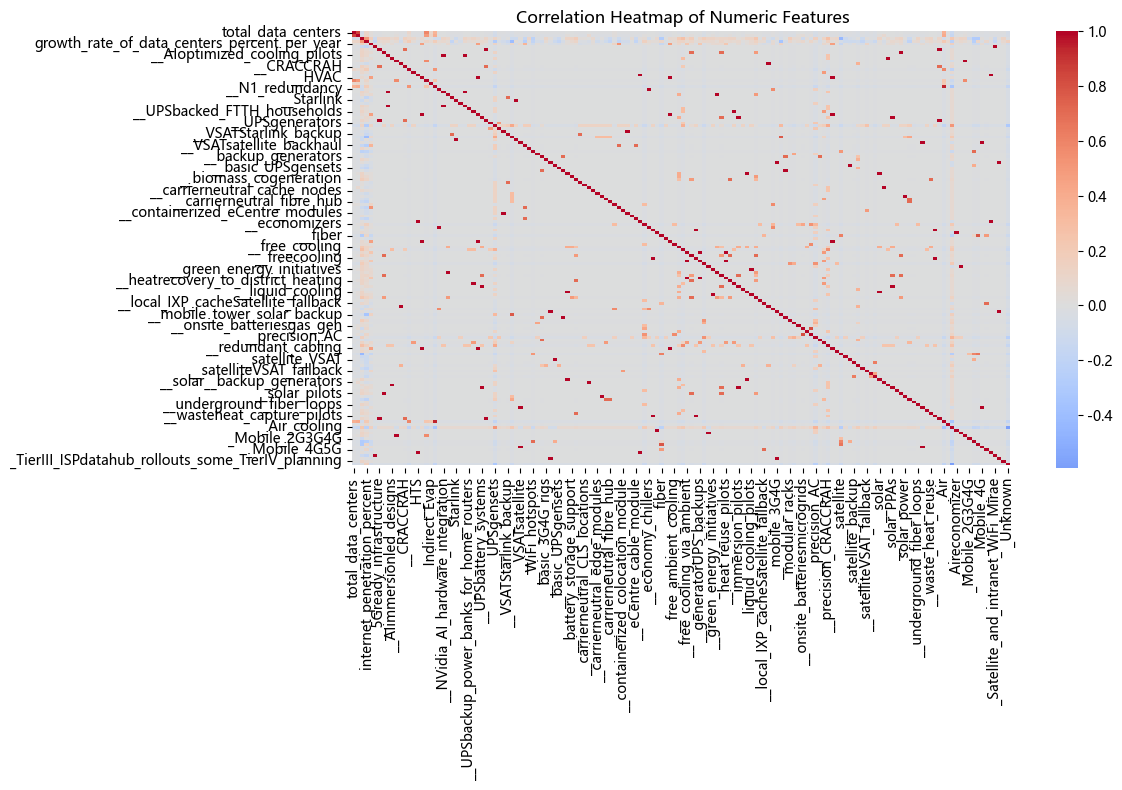

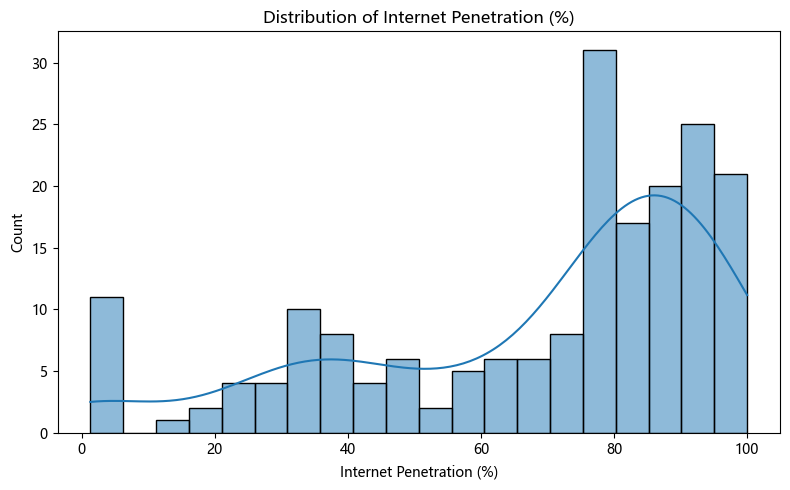

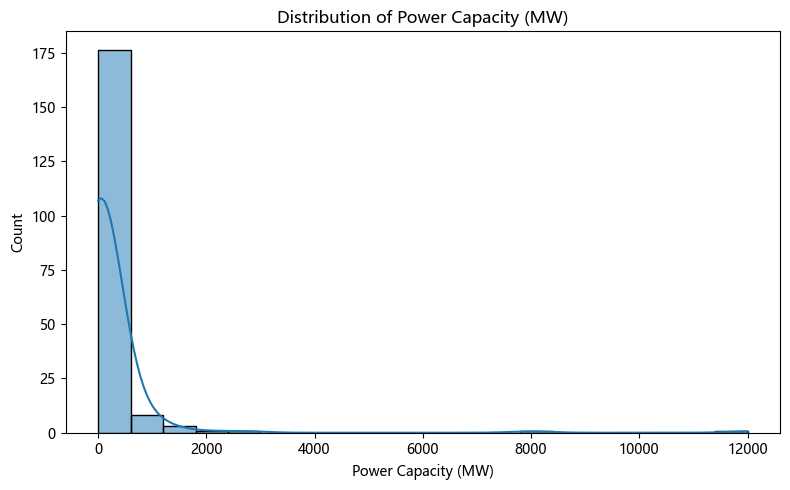


📊 EDA completed successfully!


In [7]:
# # 二次预处理也不用运行，用similar_3x_noise10.csv跑后面的，这是二次预处理
# # 📘 data_processing_cleaned.ipynb (Final Stable Version)
# # Author: Your Group
# # Purpose: Clean and preprocess dataset for Data Mining Project
# # ============================================================

# # 1️⃣ Import Libraries
# import pandas as pd
# import numpy as np
# import re
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Display settings
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 200)

# # ------------------------------------------------------------
# # 2️⃣ Load Dataset
# # ------------------------------------------------------------
# df = pd.read_csv("Book1-first clean.csv")
# print(f"✅ Data loaded successfully: {df.shape[0]} rows × {df.shape[1]} columns")

# # Preview first few rows
# df.head()

# # ------------------------------------------------------------
# # 3️⃣ Helper Functions
# # ------------------------------------------------------------

# def clean_percentage_columns(df):
#     """Fix percentage columns (values > 100 divided by 100, clip to [0,100])"""
#     percent_cols = [col for col in df.columns if "percent" in col.lower()]
#     for col in percent_cols:
#         df[col] = (
#             df[col]
#             .astype(str)
#             .str.replace("%", "", regex=False)
#             .replace("nan", np.nan)
#         )
#         df[col] = pd.to_numeric(df[col], errors="coerce")
#         df[col] = np.where(df[col] > 100, df[col] / 100, df[col])
#         df[col] = df[col].clip(0, 100)
#     print(f"🔧 Fixed {len(percent_cols)} percentage columns.")
#     return df


# def fix_internet_penetration(df):
#     """Special handling for 'internet_penetration_percent'"""
#     if "internet_penetration_percent" in df.columns:
#         df["internet_penetration_percent"] = pd.to_numeric(
#             df["internet_penetration_percent"], errors="coerce"
#         )
#         df.loc[df["internet_penetration_percent"] > 100, "internet_penetration_percent"] /= 100
#         df["internet_penetration_percent"] = df["internet_penetration_percent"].clip(0, 100)
#         print("🌐 Fixed internet_penetration_percent column.")
#     return df


# def process_cooling_technologies(df):
#     """Recreate cooling_technology columns based on a whitelist"""
#     whitelist = ["air", "liquid", "immersion", "indirect evap", "free cooling", "crac", "hvac"]
#     colname = None

#     # Try to find the cooling tech column
#     for c in df.columns:
#         if "cooling" in c.lower() and "tech" in c.lower():
#             colname = c
#             break
#     if colname is None:
#         print("⚠️ No cooling technology column found.")
#         return df

#     print(f"🧊 Processing cooling technologies from column: {colname}")
#     df[colname] = df[colname].astype(str).str.lower().str.replace(r'[^a-z0-9,;:/\-\s]', '', regex=True)

#     # Create new columns
#     for tech in whitelist:
#         df[f"cooling_{tech.replace(' ', '_')}"] = df[colname].apply(
#             lambda x: 1 if tech in x else 0
#         )

#     # Remove old noisy one-hot columns if any
#     drop_cols = [c for c in df.columns if re.search(r"冷却技术_|cooling_tech", c)]
#     df = df.drop(columns=drop_cols, errors="ignore")

#     print(f"✅ Created {len(whitelist)} clean cooling technology features.")
#     return df


# def process_tier_distribution(df):
#     """Extract tier level from tier_distribution column"""
#     if "tier_distribution" not in df.columns:
#         return df

#     def extract_tier(value):
#         if pd.isna(value):
#             return np.nan
#         match = re.search(r"(tier\s*[IVX]+)", str(value).lower())
#         if match:
#             roman = match.group(1).replace("tier", "").strip().upper()
#             mapping = {"I": 1, "II": 2, "III": 3, "IV": 4}
#             return mapping.get(roman, np.nan)
#         return np.nan

#     df["tier_level"] = df["tier_distribution"].apply(extract_tier)
#     print("🏗️ Extracted tier_level column.")
#     return df


# def clean_column_names(df):
#     """Remove spaces and special characters in column names"""
#     df.columns = (
#         df.columns.str.strip()
#         .str.replace(" ", "_")
#         .str.replace("[^A-Za-z0-9_]", "", regex=True)
#     )
#     return df


# # ------------------------------------------------------------
# # 4️⃣ Cleaning Pipeline
# # ------------------------------------------------------------
# print("\n🚀 Starting cleaning process...\n")

# df = clean_percentage_columns(df)
# df = fix_internet_penetration(df)
# df = process_cooling_technologies(df)
# df = process_tier_distribution(df)
# df = clean_column_names(df)

# # Fill numeric NaN with median safely (no inplace)
# num_cols = df.select_dtypes(include=[np.number]).columns
# for col in num_cols:
#     if df[col].isnull().any():
#         df[col] = df[col].fillna(df[col].median())
# print("🧹 Missing values filled with median for numeric columns.")

# # ------------------------------------------------------------
# # ✅ Safer sanity checks
# # ------------------------------------------------------------
# non_negative_keywords = ["percent", "capacity", "usage", "area", "mw", "population", "pue"]
# non_negative_cols = [col for col in num_cols if any(k in col.lower() for k in non_negative_keywords)]

# negatives = df[non_negative_cols][df[non_negative_cols] < 0].dropna(how="all")
# if not negatives.empty:
#     print("⚠️ Warning: Negative values found in supposed non-negative columns:")
#     print(negatives.describe())
# else:
#     print("✅ All non-negative columns passed sanity check!")

# print(f"🎯 Cleaning completed! Final shape: {df.shape}")

# # ------------------------------------------------------------
# # 5️⃣ Save Cleaned CSV
# # ------------------------------------------------------------
# df.to_csv("Book1-second clean.csv", index=False)
# print("💾 Cleaned dataset saved as 'Book1_cleaned.csv'.")

# # ------------------------------------------------------------
# # 6️⃣ Exploratory Data Analysis (EDA)
# # ------------------------------------------------------------

# # Heatmap of numeric correlation
# plt.figure(figsize=(12, 8))
# corr = df.select_dtypes(include=[np.number]).corr()
# sns.heatmap(corr, cmap="coolwarm", center=0)
# plt.title("Correlation Heatmap of Numeric Features")
# plt.tight_layout()
# plt.show()

# # Boxplot: Cooling tech vs renewable energy %
# cooling_cols = [c for c in df.columns if c.startswith("cooling_")]
# target = "average_renewable_energy_usage_percent"
# if target in df.columns and cooling_cols:
#     melted = df.melt(id_vars=[target], value_vars=cooling_cols, var_name="tech", value_name="has_tech")
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(data=melted[melted["has_tech"] == 1], x="tech", y=target)
#     plt.title("Renewable Energy Usage vs Cooling Technology")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Histogram of Internet Penetration
# if "internet_penetration_percent" in df.columns:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(df["internet_penetration_percent"], bins=20, kde=True)
#     plt.title("Distribution of Internet Penetration (%)")
#     plt.xlabel("Internet Penetration (%)")
#     plt.tight_layout()
#     plt.show()

# # Power Capacity Distribution
# if "power_capacity_MW_total" in df.columns:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(df["power_capacity_MW_total"], bins=20, kde=True)
#     plt.title("Distribution of Power Capacity (MW)")
#     plt.xlabel("Power Capacity (MW)")
#     plt.tight_layout()
#     plt.show()

# print("\n📊 EDA completed successfully!")


✅ 使用字体：Microsoft YaHei

================ 处理数据集：Book1_5x_noise20-1.csv ================
✅ Book1_5x_noise20-1 | 样本: 955 | 特征: 153

🏆 随机森林 - 前15：
                                             Feature  Importance
0                       internet_penetration_percent    0.173396
1                      Cooling technology_ satellite    0.167651
2                            power_capacity_MW_total    0.110940
3                                 total_data_centers    0.071263
4                     Cooling technology_Air cooling    0.048285
5                                         tier_level    0.041558
6                     Cooling technology_ microgrids    0.028248
7        Cooling technology_ VSAT/satellite backhaul    0.025099
8   Cooling technology_ on-site batteries/microgrids    0.019401
9                   Cooling technology_ Free Cooling    0.017965
10                        Cooling technology_ Liquid    0.017401
11           Cooling technology_ precision CRAC/CRAH    0.017106
12          

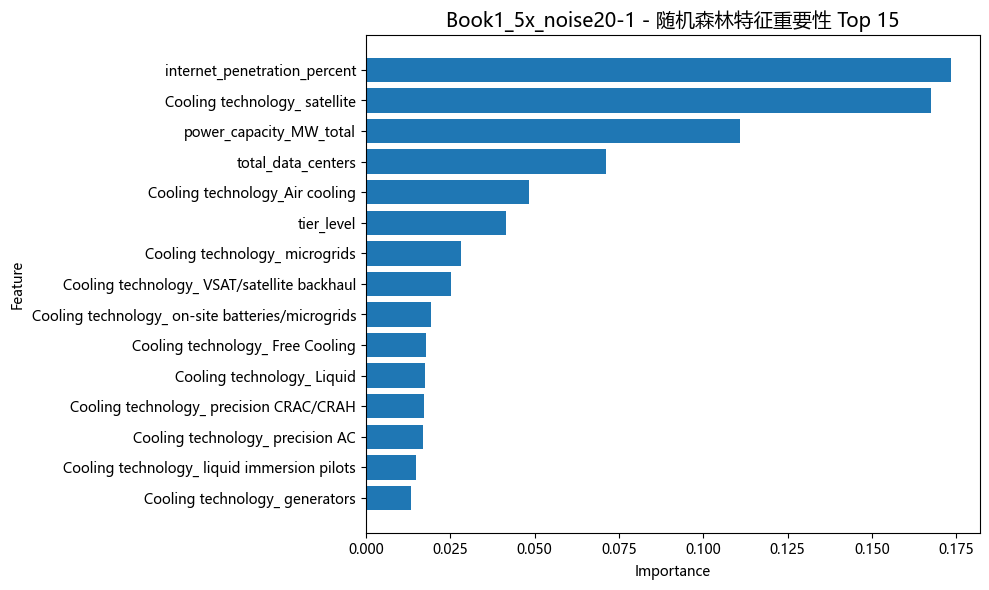

💾 已保存图像：rf_feature_importance_top15-Book1_5x_noise20-1.png


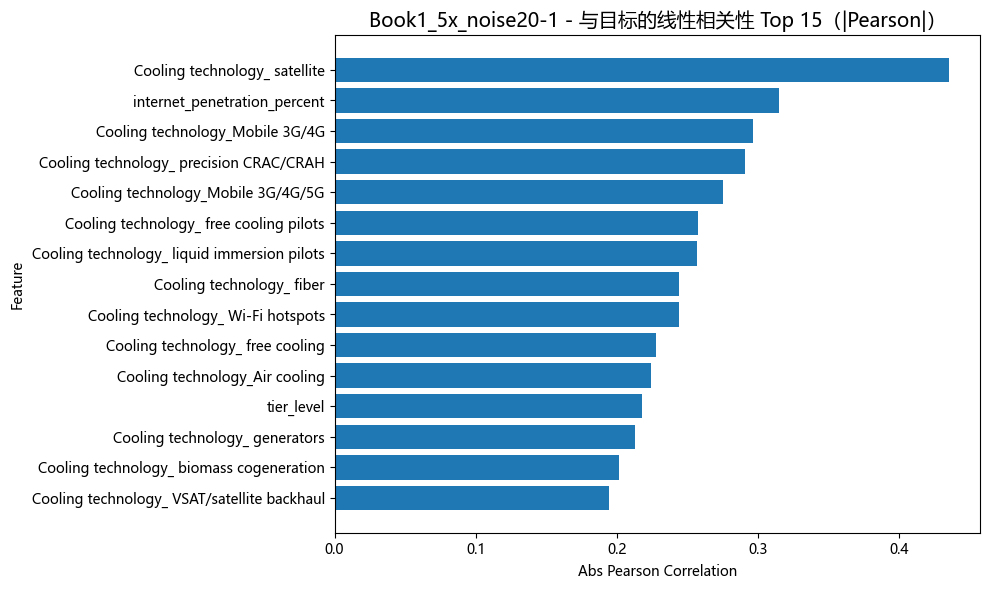

💾 已保存图像：pearson_abs_correlation_top15-Book1_5x_noise20-1.png
💾 已保存：C:\Users\hejin\DM_FINAL_Chinese\feature_importance_results-Book1_5x_noise20-1.csv

================ 处理数据集：Book1_5x_noise20-2.csv ================
✅ Book1_5x_noise20-2 | 样本: 955 | 特征: 153

🏆 随机森林 - 前15：
                                             Feature  Importance
0                      Cooling technology_ satellite    0.189876
1                       internet_penetration_percent    0.174934
2                            power_capacity_MW_total    0.092794
3                                 total_data_centers    0.078400
4                                         tier_level    0.052687
5                     Cooling technology_Air cooling    0.033075
6              Cooling technology_ basic UPS/gensets    0.028639
7   Cooling technology_ on-site batteries/microgrids    0.025438
8                   Cooling technology_ precision AC    0.022476
9                   Cooling technology_ Free Cooling    0.022436
10              

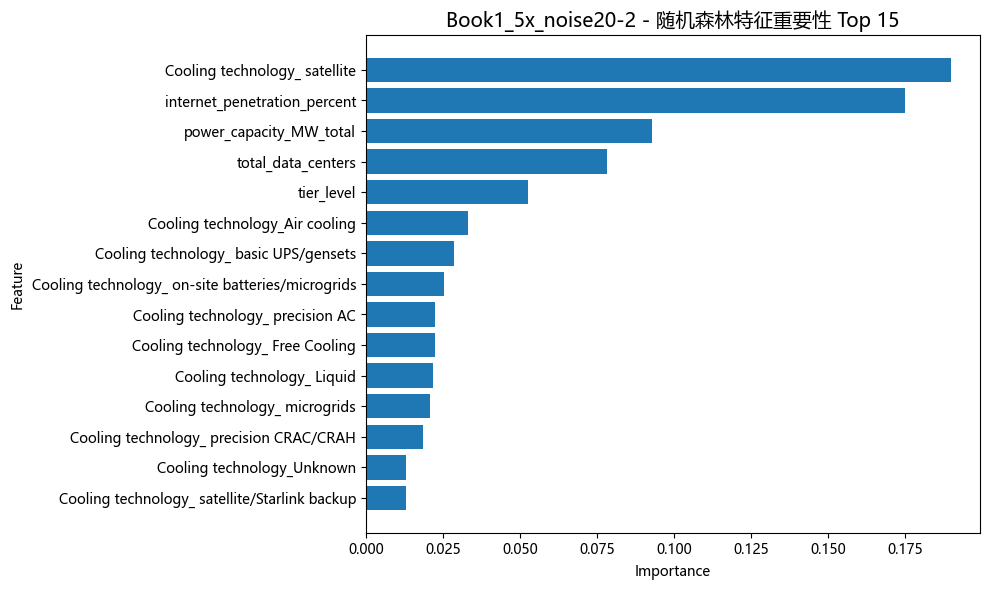

💾 已保存图像：rf_feature_importance_top15-Book1_5x_noise20-2.png


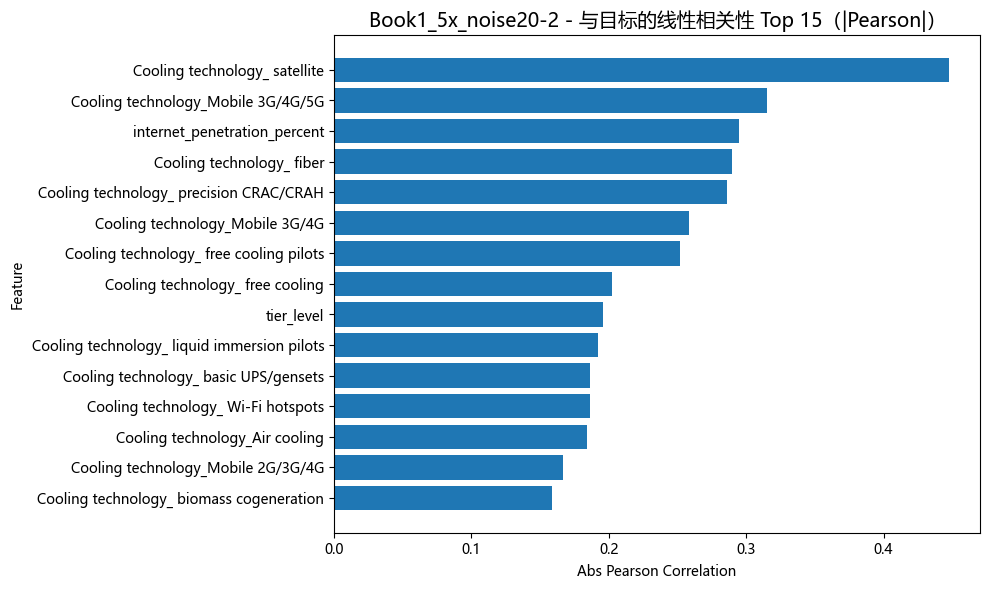

💾 已保存图像：pearson_abs_correlation_top15-Book1_5x_noise20-2.png
💾 已保存：C:\Users\hejin\DM_FINAL_Chinese\feature_importance_results-Book1_5x_noise20-2.csv

================ 处理数据集：Book1_5x_noise20-3.csv ================
✅ Book1_5x_noise20-3 | 样本: 955 | 特征: 153

🏆 随机森林 - 前15：
                                             Feature  Importance
0                       internet_penetration_percent    0.159929
1                            power_capacity_MW_total    0.149840
2                      Cooling technology_ satellite    0.119691
3                                 total_data_centers    0.070417
4            Cooling technology_ free cooling pilots    0.055356
5                                         tier_level    0.049391
6                     Cooling technology_Air cooling    0.031969
7                   Cooling technology_ free cooling    0.024455
8                     Cooling technology_ generators    0.023189
9            Cooling technology_ precision CRAC/CRAH    0.023071
10              

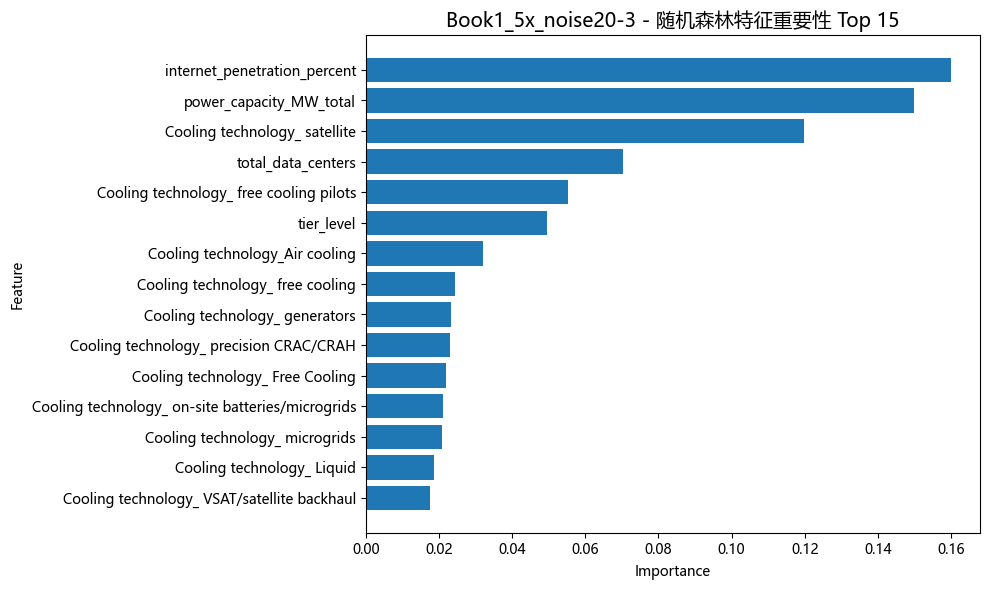

💾 已保存图像：rf_feature_importance_top15-Book1_5x_noise20-3.png


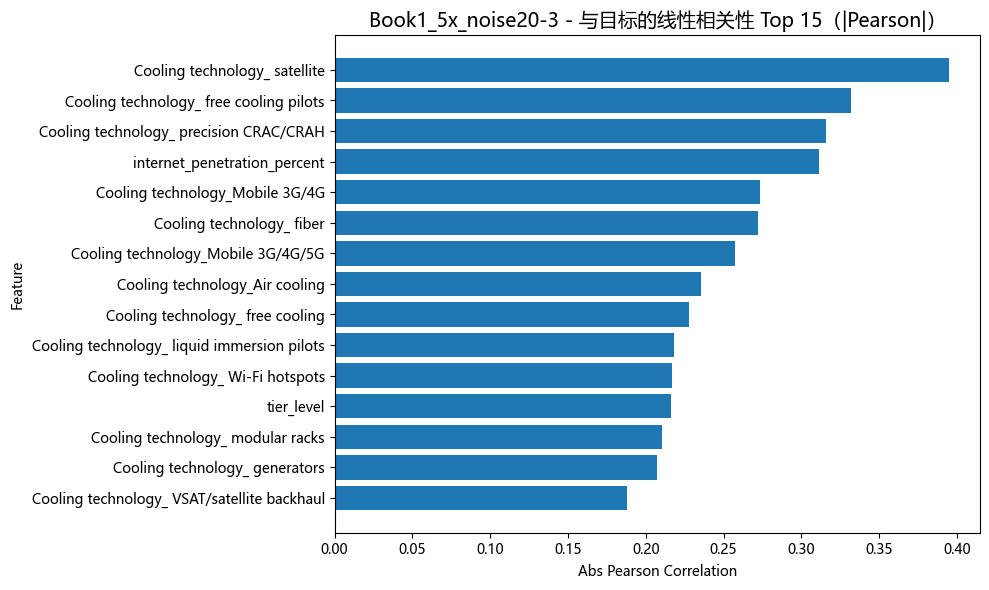

💾 已保存图像：pearson_abs_correlation_top15-Book1_5x_noise20-3.png
💾 已保存：C:\Users\hejin\DM_FINAL_Chinese\feature_importance_results-Book1_5x_noise20-3.csv

================ 处理数据集：Book1_5x_noise20-4.csv ================
✅ Book1_5x_noise20-4 | 样本: 955 | 特征: 153

🏆 随机森林 - 前15：
                                             Feature  Importance
0                       internet_penetration_percent    0.195720
1                            power_capacity_MW_total    0.154398
2                      Cooling technology_ satellite    0.116216
3                                 total_data_centers    0.060207
4                                         tier_level    0.048089
5                     Cooling technology_Air cooling    0.044420
6                     Cooling technology_ microgrids    0.042229
7   Cooling technology_ on-site batteries/microgrids    0.022643
8                   Cooling technology_ Free Cooling    0.021719
9                         Cooling technology_Unknown    0.020937
10              

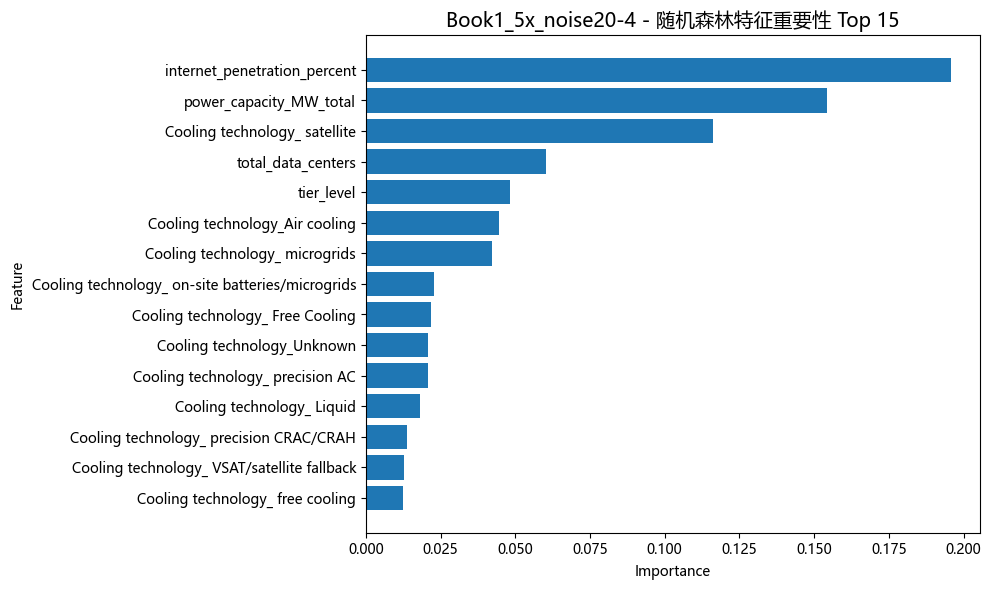

💾 已保存图像：rf_feature_importance_top15-Book1_5x_noise20-4.png


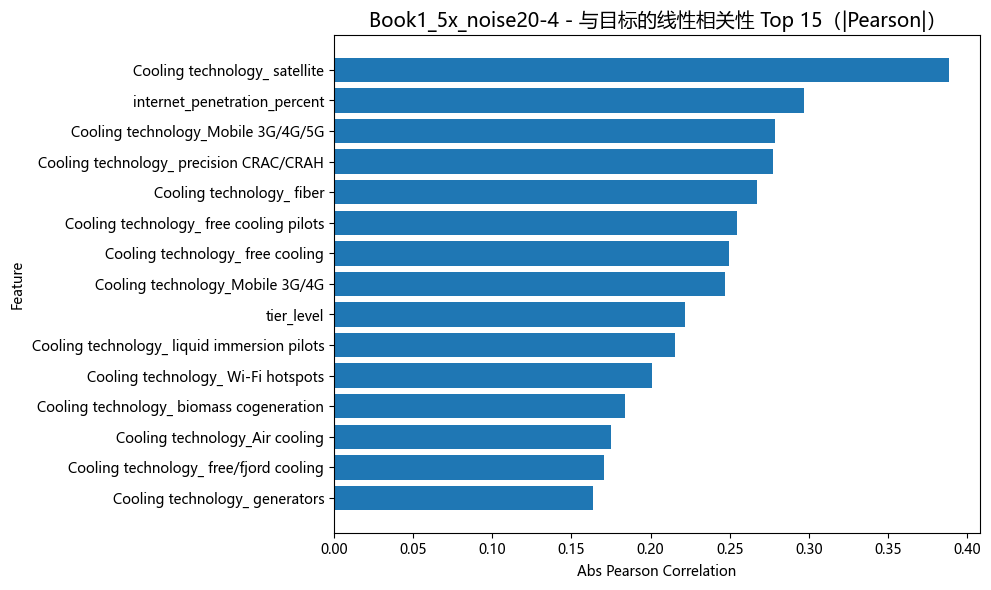

💾 已保存图像：pearson_abs_correlation_top15-Book1_5x_noise20-4.png
💾 已保存：C:\Users\hejin\DM_FINAL_Chinese\feature_importance_results-Book1_5x_noise20-4.csv

================ 处理数据集：Book1_5x_noise20-5.csv ================
✅ Book1_5x_noise20-5 | 样本: 955 | 特征: 153

🏆 随机森林 - 前15：
                                             Feature  Importance
0                      Cooling technology_ satellite    0.226116
1                       internet_penetration_percent    0.164206
2                            power_capacity_MW_total    0.090609
3                                 total_data_centers    0.084332
4                                         tier_level    0.034841
5                     Cooling technology_Air cooling    0.032903
6            Cooling technology_ precision CRAC/CRAH    0.026777
7                   Cooling technology_ Free Cooling    0.024951
8                     Cooling technology_ microgrids    0.023409
9   Cooling technology_ on-site batteries/microgrids    0.023084
10              

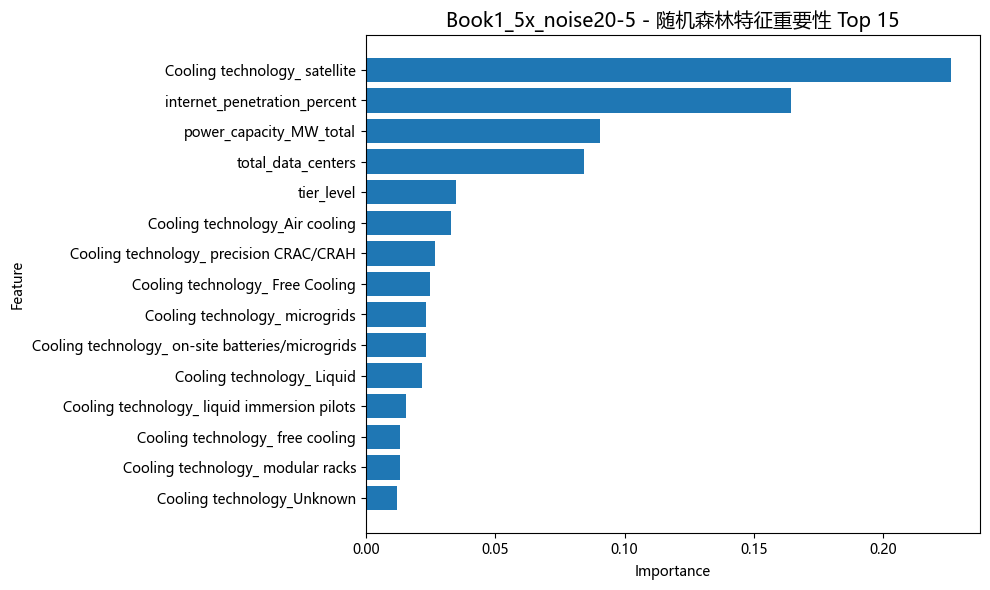

💾 已保存图像：rf_feature_importance_top15-Book1_5x_noise20-5.png


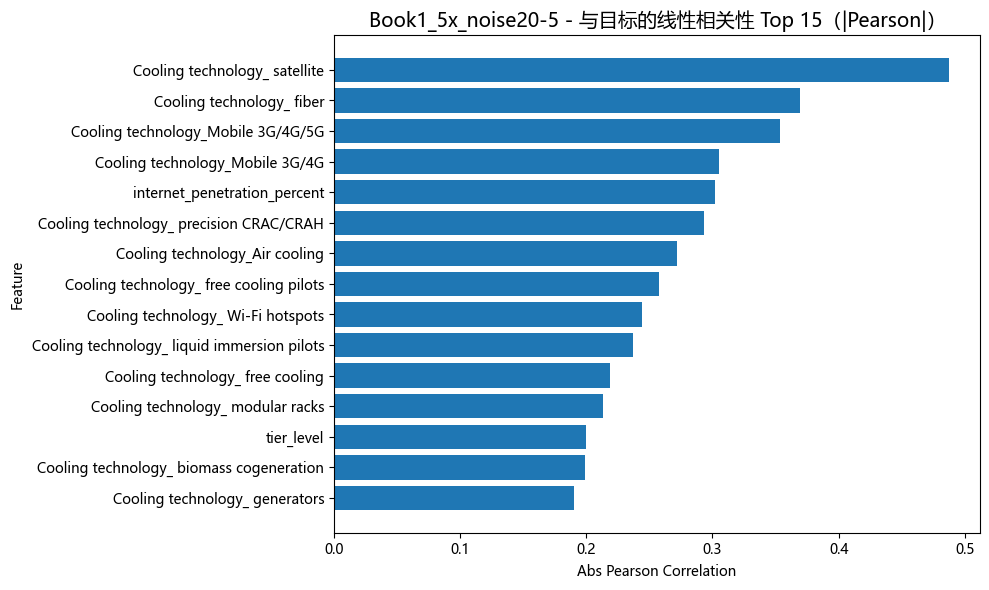

💾 已保存图像：pearson_abs_correlation_top15-Book1_5x_noise20-5.png
💾 已保存：C:\Users\hejin\DM_FINAL_Chinese\feature_importance_results-Book1_5x_noise20-5.csv

💾 汇总长表已保存：C:\Users\hejin\DM_FINAL_Chinese\feature_importance_all_datasets.csv
💾 5份平均效果榜单已保存：C:\Users\hejin\DM_FINAL_Chinese\feature_importance_avg.csv

🏆 平均综合得分 Top 15：
                                         Feature  RF_Importance_mean  \
109                Cooling technology_ satellite            0.163910   
149                 internet_penetration_percent            0.173637   
150                      power_capacity_MW_total            0.119716   
151                                   tier_level            0.045313   
106      Cooling technology_ precision CRAC/CRAH            0.019842   
135               Cooling technology_Air cooling            0.038131   
72       Cooling technology_ free cooling pilots            0.014939   
152                           total_data_centers            0.072924   
67                     Cooling te

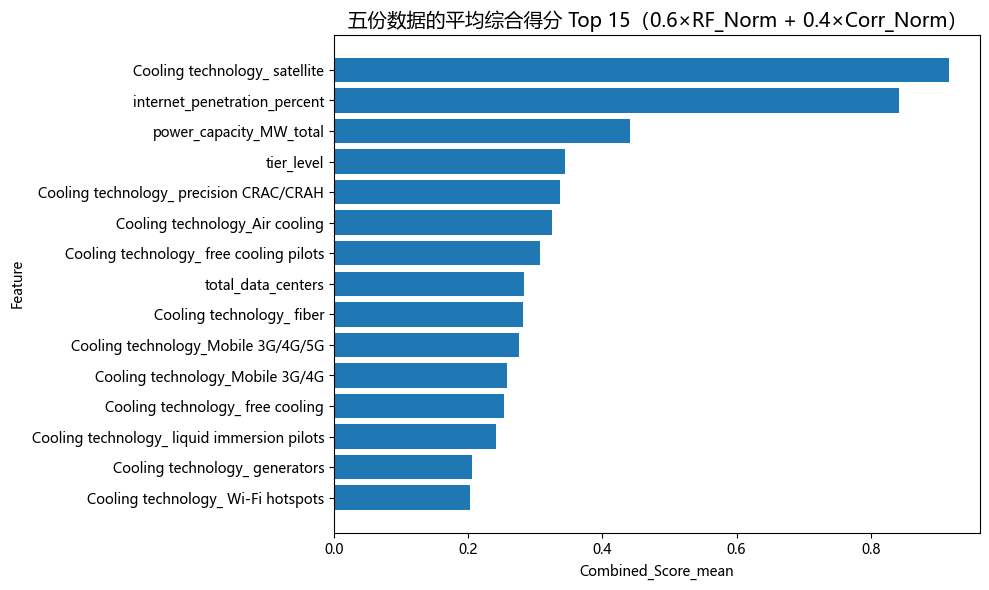

💾 已保存：feature_importance_top15-AVG.png


In [3]:
# ============================================================
# 📘 Data Mining Project - Feature Selection (Multi-dataset Compare, No-Warning & CN Font)
# ============================================================

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.ensemble import RandomForestRegressor

# ------------------------------------------------------------
# 0️⃣ 全局设置：中文字体 & 警告处理
# ------------------------------------------------------------
font_candidates = [
    "Microsoft YaHei", "SimHei", "PingFang SC", "Heiti SC",
    "Arial Unicode MS", "Noto Sans CJK SC", "Source Han Sans CN",
    "WenQuanYi Micro Hei"
]
_chosen_font = None
for _name in font_candidates:
    try:
        path = fm.findfont(fm.FontProperties(family=_name))
        if os.path.exists(path):
            plt.rcParams["font.sans-serif"] = [_name]
            _chosen_font = _name
            break
    except Exception:
        continue

plt.rcParams["axes.unicode_minus"] = False
if _chosen_font:
    print(f"✅ 使用字体：{_chosen_font}")
else:
    print("⚠️ 未检测到常见中文字体，建议安装“微软雅黑/黑体/Noto Sans CJK”等以避免中文乱码。")
warnings.filterwarnings("ignore", message="Glyph .* missing from current font")

# ------------------------------------------------------------
# 🔧 公共工具函数
# ------------------------------------------------------------
TOPK = 15
TARGET_COL = "average_renewable_energy_usage_percent"

# —— 新增：特征名中的特殊连字符统一为 ASCII '-'，避免 8209 警告 ——
_HYPHEN_MAP = {
    "\u2010": "-",  # hyphen
    "\u2011": "-",  # non-breaking hyphen (导致你看到的 8209 警告)
    "\u00AD": "-",  # soft hyphen
    "\u2212": "-",  # minus sign
}
def _normalize_feature_name(s):
    if not isinstance(s, str):
        s = str(s)
    for k, v in _HYPHEN_MAP.items():
        s = s.replace(k, v)
    return s

def _normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    return df.rename(columns={c: _normalize_feature_name(c) for c in df.columns})

def load_xy(csv_path: str):
    """读取并返回 (X, y)。X仅保留数值列（不含目标），y为目标（数值+中位数填补），并统一列名连字符为 '-'。"""
    df = pd.read_csv(csv_path, encoding="utf-8-sig")
    # 统一列名中的连字符，避免绘图缺字形告警
    df = _normalize_columns(df)

    if TARGET_COL not in df.columns:
        raise ValueError(f"❌ 目标列 {TARGET_COL} 不在文件 {csv_path} 中")

    y = pd.to_numeric(df[TARGET_COL], errors="coerce").fillna(df[TARGET_COL].median())

    # 仅数值特征
    X = df.select_dtypes(include=[np.number]).drop(columns=[TARGET_COL], errors="ignore").copy()

    # 布尔转 0/1（若存在）
    for c in X.columns:
        if X[c].dtype == bool:
            X[c] = X[c].astype(int)

    # 容错为数值 + 缺失填补
    X = X.apply(pd.to_numeric, errors="coerce").fillna(X.median(numeric_only=True))

    # 剔除常量列
    const_cols = [c for c in X.columns if X[c].nunique(dropna=True) <= 1]
    if const_cols:
        X = X.drop(columns=const_cols)
    return X, y

def plot_barh(df_top: pd.DataFrame, value_col: str, title: str, outfile: str):
    fig, ax = plt.subplots(figsize=(10, 6))
    t = df_top.iloc[:TOPK].copy().iloc[::-1]
    # 再保险：特征名里若还有特殊连字符，绘图前再规范一次
    t["Feature"] = t["Feature"].apply(_normalize_feature_name)
    ax.barh(t["Feature"], t[value_col])
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(value_col)
    ax.set_ylabel("Feature")
    plt.tight_layout()
    plt.savefig(outfile, dpi=200, bbox_inches="tight")
    plt.show()
    print(f"💾 已保存图像：{outfile}")

def analyze_one(csv_path: str, tag: str):
    """
    对单个数据集计算：
      - 随机森林重要性 rf_importance
      - 皮尔逊相关 corr_importance（绝对值）
      - 融合分 merged（含 RF_Norm, Corr_Norm, Combined_Score）
    并保存单数据集的 CSV 与两张 Top15 图。
    返回 merged 并加上 dataset 列方便汇总。
    """
    print(f"\n================ 处理数据集：{csv_path} ================")
    X, y = load_xy(csv_path)
    print(f"✅ {tag} | 样本: {X.shape[0]} | 特征: {X.shape[1]}")

    # 随机森林特征重要性
    rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=1)
    rf.fit(X, y)
    rf_importance = (
        pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
        .sort_values(by="Importance", ascending=False)
        .reset_index(drop=True)
    )
    # 规范特征名（确保合并时口径一致 & 避免绘图告警）
    rf_importance["Feature"] = rf_importance["Feature"].apply(_normalize_feature_name)

    print("\n🏆 随机森林 - 前15：")
    print(rf_importance.head(TOPK))

    # 皮尔逊相关（绝对值）
    corr_series = X.apply(lambda s: s.corr(y))
    corr_importance = (
        corr_series.abs().fillna(0.0).sort_values(ascending=False)
        .reset_index().rename(columns={"index": "Feature", 0: "Correlation"})
    )
    corr_importance["Feature"] = corr_importance["Feature"].apply(_normalize_feature_name)

    print("\n📈 皮尔逊相关 - 前15：")
    print(corr_importance.head(TOPK))

    # 画图
    plot_barh(
        rf_importance, "Importance",
        f"{tag} - 随机森林特征重要性 Top {TOPK}",
        outfile=f"rf_feature_importance_top15-{tag}.png"
    )
    plot_barh(
        corr_importance.rename(columns={"Correlation": "Abs Pearson Correlation"}),
        "Abs Pearson Correlation",
        f"{tag} - 与目标的线性相关性 Top {TOPK}（|Pearson|）",
        outfile=f"pearson_abs_correlation_top15-{tag}.png"
    )

    # 归一化 + 融合分
    rf_norm = rf_importance.copy()
    rf_norm["RF_Norm"] = (rf_norm["Importance"] - rf_norm["Importance"].min()) / (
        rf_norm["Importance"].max() - rf_norm["Importance"].min() + 1e-12
    )
    rf_norm = rf_norm[["Feature", "Importance", "RF_Norm"]]

    corr_norm = corr_importance.copy()
    corr_norm["Corr_Norm"] = (corr_norm["Correlation"] - corr_norm["Correlation"].min()) / (
        corr_norm["Correlation"].max() - corr_norm["Correlation"].min() + 1e-12
    )
    corr_norm = corr_norm[["Feature", "Correlation", "Corr_Norm"]]

    merged = rf_norm.merge(corr_norm, on="Feature", how="outer").fillna(0.0)
    merged["Combined_Score"] = 0.6 * merged["RF_Norm"] + 0.4 * merged["Corr_Norm"]
    merged = merged.sort_values(by=["Combined_Score", "Importance", "Correlation"], ascending=False)

    # 单数据集输出
    out_csv = f"feature_importance_results-{tag}.csv"
    merged.to_csv(out_csv, index=False, encoding="utf-8-sig")
    print(f"💾 已保存：{os.path.abspath(out_csv)}")

    merged["dataset"] = tag
    return merged

# ------------------------------------------------------------
# 1️⃣ 批量处理 5 个数据集（存在哪个就跑哪个）
# ------------------------------------------------------------
candidates = [f"Book1_5x_noise20-{i}.csv" for i in range(1, 6)]
pairs = [(p, os.path.splitext(os.path.basename(p))[0]) for p in candidates if os.path.exists(p)]

if not pairs:
    raise FileNotFoundError("未找到 Book1_5x_noise20-*.csv 文件，请确认文件已放在当前目录。")

all_merged = []
for path, tag in pairs:
    m = analyze_one(path, tag)
    all_merged.append(m)

# ------------------------------------------------------------
# 2️⃣ 汇总（长表）与“5份平均效果”的总榜单
# ------------------------------------------------------------
all_long = pd.concat(all_merged, ignore_index=True)
all_long.to_csv("feature_importance_all_datasets.csv", index=False, encoding="utf-8-sig")
print(f"\n💾 汇总长表已保存：{os.path.abspath('feature_importance_all_datasets.csv')}")

# 按特征求 5 份平均
avg = (
    all_long.groupby("Feature", as_index=False)
    .agg({
        "Importance": "mean",
        "Correlation": "mean",
        "RF_Norm": "mean",
        "Corr_Norm": "mean",
        "Combined_Score": "mean"
    })
    .rename(columns={
        "Importance": "RF_Importance_mean",
        "Correlation": "Pearson_Correlation_mean",
        "RF_Norm": "RF_Norm_mean",
        "Corr_Norm": "Corr_Norm_mean",
        "Combined_Score": "Combined_Score_mean"
    })
    .sort_values(by=["Combined_Score_mean", "RF_Importance_mean", "Pearson_Correlation_mean"], ascending=False)
)

avg_out = "feature_importance_avg.csv"
avg.to_csv(avg_out, index=False, encoding="utf-8-sig")
print(f"💾 5份平均效果榜单已保存：{os.path.abspath(avg_out)}")

print("\n🏆 平均综合得分 Top 15：")
print(avg.head(TOPK))

# ------------------------------------------------------------
# 3️⃣ 平均 Top15 可视化
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
topk_avg = avg.iloc[:TOPK].copy().iloc[::-1]
ax.barh(topk_avg["Feature"].apply(_normalize_feature_name), topk_avg["Combined_Score_mean"])
ax.set_title("五份数据的平均综合得分 Top 15（0.6×RF_Norm + 0.4×Corr_Norm）", fontsize=14)
ax.set_xlabel("Combined_Score_mean")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.savefig("feature_importance_top15-AVG.png", dpi=200, bbox_inches="tight")
plt.show()
print("💾 已保存：feature_importance_top15-AVG.png")



================ 评估数据集：Book1_5x_noise20-1 ================
✅ 样本: 955 | 特征: 153
📊 测试比例 0.1 | 训练集: 859 | 测试集: 96

🚀 训练模型：Linear Regression
✅ Linear Regression -> RMSE: 11.494, MAE: 7.554, R²: 0.842

🚀 训练模型：Random Forest
✅ Random Forest -> RMSE: 10.321, MAE: 7.395, R²: 0.873

🚀 训练模型：Gradient Boosting
✅ Gradient Boosting -> RMSE: 9.611, MAE: 6.767, R²: 0.890

🏆 模型性能对比：
               Model       RMSE       MAE        R2
2  Gradient Boosting   9.611144  6.766594  0.889510
1      Random Forest  10.320659  7.394740  0.872594
0  Linear Regression  11.493795  7.554353  0.841984
💾 已保存：model_eval_Book1_5x_noise20-1_ts10.csv


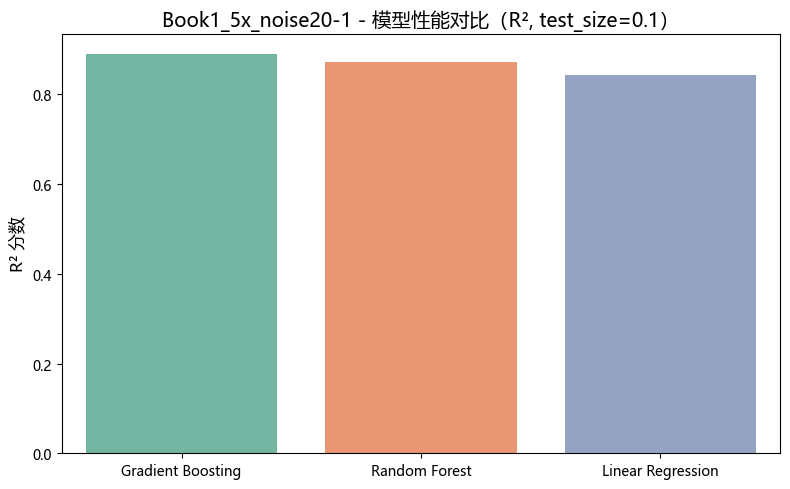

💾 已保存：model_performance_Book1_5x_noise20-1_ts10.png

================ 评估数据集：Book1_5x_noise20-2 ================
✅ 样本: 955 | 特征: 153
📊 测试比例 0.1 | 训练集: 859 | 测试集: 96

🚀 训练模型：Linear Regression
✅ Linear Regression -> RMSE: 9.103, MAE: 5.941, R²: 0.907

🚀 训练模型：Random Forest
✅ Random Forest -> RMSE: 7.571, MAE: 5.336, R²: 0.936

🚀 训练模型：Gradient Boosting
✅ Gradient Boosting -> RMSE: 8.175, MAE: 5.748, R²: 0.925

🏆 模型性能对比：
               Model      RMSE       MAE        R2
1      Random Forest  7.571231  5.336181  0.935572
2  Gradient Boosting  8.175017  5.747911  0.924886
0  Linear Regression  9.102748  5.941426  0.906870
💾 已保存：model_eval_Book1_5x_noise20-2_ts10.csv


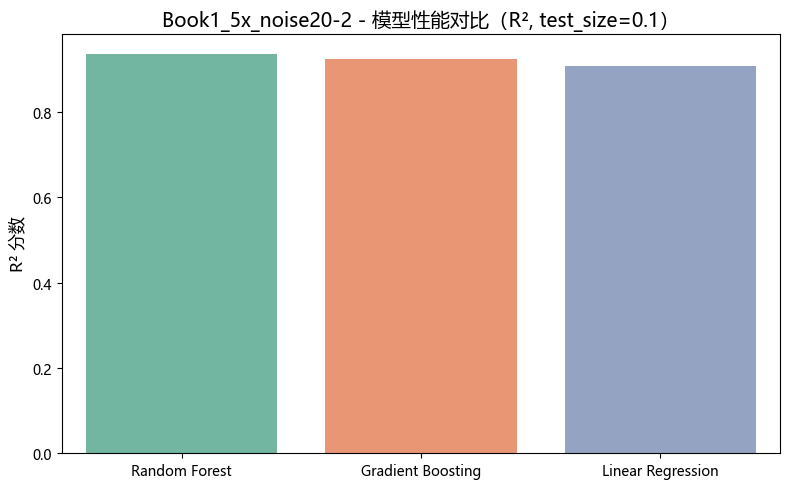

💾 已保存：model_performance_Book1_5x_noise20-2_ts10.png

================ 评估数据集：Book1_5x_noise20-3 ================
✅ 样本: 955 | 特征: 153
📊 测试比例 0.1 | 训练集: 859 | 测试集: 96

🚀 训练模型：Linear Regression
✅ Linear Regression -> RMSE: 12.635, MAE: 7.845, R²: 0.797

🚀 训练模型：Random Forest
✅ Random Forest -> RMSE: 10.506, MAE: 7.148, R²: 0.860

🚀 训练模型：Gradient Boosting
✅ Gradient Boosting -> RMSE: 10.152, MAE: 7.106, R²: 0.869

🏆 模型性能对比：
               Model       RMSE       MAE        R2
2  Gradient Boosting  10.151946  7.106107  0.869144
1      Random Forest  10.505585  7.147859  0.859869
0  Linear Regression  12.635020  7.845351  0.797304
💾 已保存：model_eval_Book1_5x_noise20-3_ts10.csv


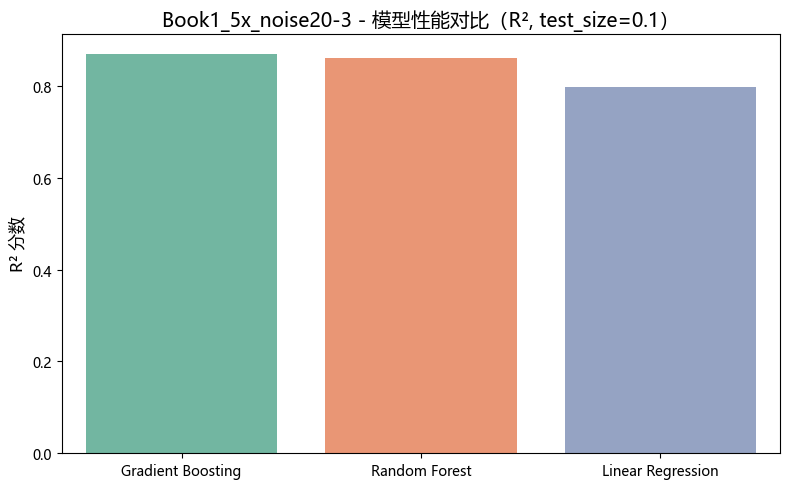

💾 已保存：model_performance_Book1_5x_noise20-3_ts10.png

================ 评估数据集：Book1_5x_noise20-4 ================
✅ 样本: 955 | 特征: 153
📊 测试比例 0.1 | 训练集: 859 | 测试集: 96

🚀 训练模型：Linear Regression
✅ Linear Regression -> RMSE: 11.185, MAE: 8.033, R²: 0.851

🚀 训练模型：Random Forest
✅ Random Forest -> RMSE: 11.806, MAE: 8.009, R²: 0.834

🚀 训练模型：Gradient Boosting
✅ Gradient Boosting -> RMSE: 9.340, MAE: 6.371, R²: 0.896

🏆 模型性能对比：
               Model       RMSE       MAE        R2
2  Gradient Boosting   9.340156  6.371394  0.895816
0  Linear Regression  11.184817  8.032608  0.850600
1      Random Forest  11.806375  8.009248  0.833533
💾 已保存：model_eval_Book1_5x_noise20-4_ts10.csv


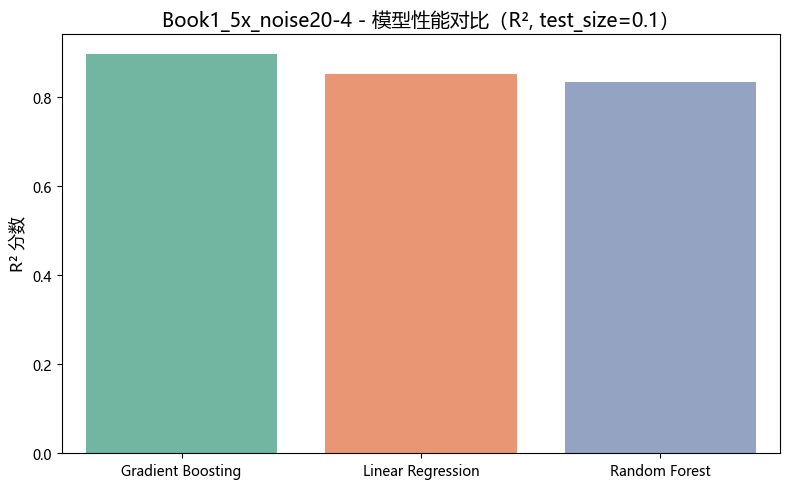

💾 已保存：model_performance_Book1_5x_noise20-4_ts10.png

================ 评估数据集：Book1_5x_noise20-5 ================
✅ 样本: 955 | 特征: 153
📊 测试比例 0.1 | 训练集: 859 | 测试集: 96

🚀 训练模型：Linear Regression
✅ Linear Regression -> RMSE: 12.368, MAE: 7.672, R²: 0.834

🚀 训练模型：Random Forest
✅ Random Forest -> RMSE: 10.390, MAE: 7.174, R²: 0.883

🚀 训练模型：Gradient Boosting
✅ Gradient Boosting -> RMSE: 9.089, MAE: 6.230, R²: 0.910

🏆 模型性能对比：
               Model       RMSE       MAE        R2
2  Gradient Boosting   9.088824  6.229951  0.910469
1      Random Forest  10.390341  7.173772  0.882991
0  Linear Regression  12.367918  7.671631  0.834212
💾 已保存：model_eval_Book1_5x_noise20-5_ts10.csv


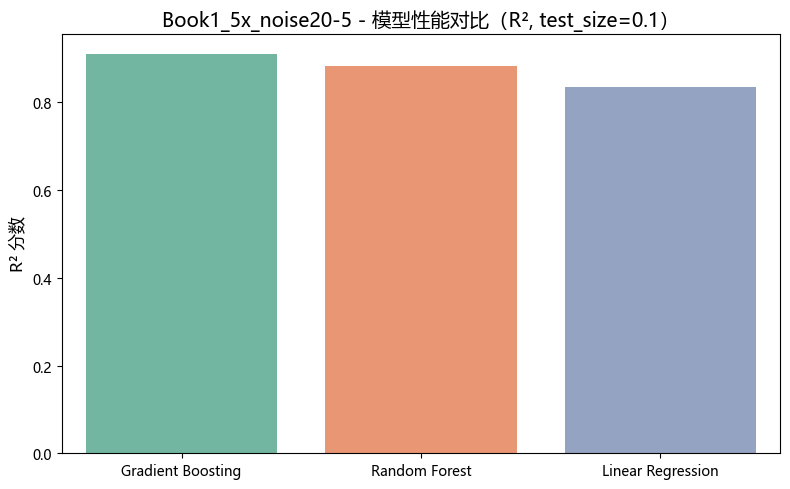

💾 已保存：model_performance_Book1_5x_noise20-5_ts10.png

💾 已保存：model_eval_all_ts10.csv
💾 已保存：model_eval_overall_avg_ts10.csv

🏆 跨数据集（test_size=0.1）的整体均值（R² 由高到低）：
               Model       RMSE       MAE        R2
0  Gradient Boosting   9.273418  6.444391  0.897965
2      Random Forest  10.118838  7.012360  0.876912
1  Linear Regression  11.356860  7.409074  0.846194


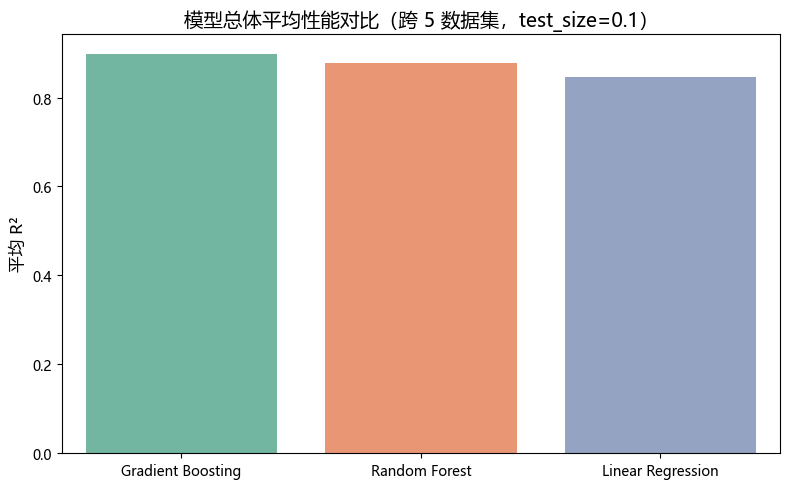

💾 已保存：model_performance_overall_avg_ts10.png


In [2]:
# ============================================================
# 📘 Multi-dataset Modeling & Evaluation (only 90/10, CN Font, No-Warning)
#    - 批量评估 Book1_5x_noise20-{1..5}.csv（LR / RF / GB）
#    - 每个数据集单独导出结果 + 全部合并 + 跨数据集平均（仅 test_size=0.1）
# ============================================================

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ---------------------------------------------------------------
# ✅ 字体设置（支持中文与上标符号）
# ---------------------------------------------------------------
font_candidates = ["Microsoft YaHei", "SimHei", "PingFang SC", "Heiti SC",
                   "Arial Unicode MS", "Noto Sans CJK SC", "Source Han Sans CN",
                   "WenQuanYi Micro Hei"]
for f in font_candidates:
    try:
        p = fm.findfont(fm.FontProperties(family=f))
        if os.path.exists(p):
            plt.rcParams['font.sans-serif'] = [f]
            break
    except Exception:
        pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore", message="Glyph .* missing from current font")

# ---------------------------------------------------------------
# 🔧 可配置项
# ---------------------------------------------------------------
DATASETS = [f"Book1_5x_noise20-{i}.csv" for i in range(1, 6)]
DATASETS = [p for p in DATASETS if os.path.exists(p)]
if not DATASETS:
    raise FileNotFoundError("未找到 Book1_5x_noise20-*.csv 文件，请确认放在当前目录。")

TARGET = "average_renewable_energy_usage_percent"
TEST_SIZE = 0.1            # 仅保留 90/10
RANDOM_STATE = 42

# ---------------------------------------------------------------
# 📦 模型集合
# ---------------------------------------------------------------
def make_models():
    return {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(
            random_state=RANDOM_STATE, n_estimators=300, max_depth=12, n_jobs=1
        ),
        "Gradient Boosting": GradientBoostingRegressor(
            random_state=RANDOM_STATE, n_estimators=300, learning_rate=0.1, max_depth=4
        )
    }

# ---------------------------------------------------------------
# 🧹 数据加载与预处理（与原脚本一致逻辑）
# ---------------------------------------------------------------
def load_and_prepare(path: str):
    df = pd.read_csv(path, encoding="utf-8-sig")
    if TARGET not in df.columns:
        raise ValueError(f"❌ 目标列 {TARGET} 不在文件 {path} 中")

    # 删除缺失率过高的列（≥95%）
    missing_ratio = df.isna().mean()
    high_missing_cols = missing_ratio[missing_ratio >= 0.95].index
    if len(high_missing_cols) > 0:
        df = df.drop(columns=high_missing_cols)
        print(f"🧹 [{os.path.basename(path)}] 丢弃高缺失列（≥95%缺失）：{len(high_missing_cols)} 列")

    # 只保留数值列（若目标不在其中则追加）
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if TARGET not in num_cols:
        num_cols.append(TARGET)
    df = df[num_cols]

    # 缺失填补
    df = df.fillna(df.median(numeric_only=True))

    # 分离特征与目标
    X = df.drop(columns=[TARGET])
    y = df[TARGET]
    return X, y

# ---------------------------------------------------------------
# 🚀 批量评估（仅 test_size=0.1）
# ---------------------------------------------------------------
all_rows = []  # 保存长表
for path in DATASETS:
    ds_name = os.path.splitext(os.path.basename(path))[0]
    print(f"\n================ 评估数据集：{ds_name} ================")
    X, y = load_and_prepare(path)
    print(f"✅ 样本: {X.shape[0]} | 特征: {X.shape[1]}")

    models = make_models()

    # 固定随机种子，保证可复现
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )
    print(f"📊 测试比例 {TEST_SIZE:.1f} | 训练集: {X_train.shape[0]} | 测试集: {X_test.shape[0]}")

    results = []
    for name, model in models.items():
        print(f"\n🚀 训练模型：{name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append([name, rmse, mae, r2])
        # 记录到长表
        all_rows.append({
            "dataset": ds_name,
            "test_size": TEST_SIZE,
            "Model": name,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2
        })
        print(f"✅ {name} -> RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

    # 当前数据集结果表
    results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])
    results_df.sort_values(by="R2", ascending=False, inplace=True)
    print("\n🏆 模型性能对比：")
    print(results_df)

    # 单数据集结果保存（标注 ts10）
    out_single = f"model_eval_{ds_name}_ts10.csv"
    results_df.to_csv(out_single, index=False, encoding="utf-8-sig")
    print(f"💾 已保存：{out_single}")

    # 可视化（无警告）
    plt.figure(figsize=(8, 5))
    sns.barplot(data=results_df, x="Model", y="R2", hue="Model", palette="Set2", legend=False)
    plt.title(f"{ds_name} - 模型性能对比（R², test_size=0.1）", fontsize=14)
    plt.xlabel("")
    plt.ylabel("R² 分数", fontsize=12)
    plt.tight_layout()
    out_png = f"model_performance_{ds_name}_ts10.png"
    plt.savefig(out_png, dpi=300)
    plt.show()
    print(f"💾 已保存：{out_png}")

# ---------------------------------------------------------------
# 📊 汇总与平均（仅 test_size=0.1）
# ---------------------------------------------------------------
all_df = pd.DataFrame(all_rows)
all_df = all_df.sort_values(by=["dataset", "R2"], ascending=[True, False])

# 1) 全部长表
all_df.to_csv("model_eval_all_ts10.csv", index=False, encoding="utf-8-sig")
print("\n💾 已保存：model_eval_all_ts10.csv")

# 2) 跨数据集的整体均值（每个模型一个分数）
overall_avg = (all_df
               .groupby("Model", as_index=False)[["RMSE", "MAE", "R2"]]
               .mean()
               .sort_values(by="R2", ascending=False))
overall_avg.to_csv("model_eval_overall_avg_ts10.csv", index=False, encoding="utf-8-sig")
print("💾 已保存：model_eval_overall_avg_ts10.csv")

print("\n🏆 跨数据集（test_size=0.1）的整体均值（R² 由高到低）：")
print(overall_avg)

# ---------------------------------------------------------------
# 🖼️ 总体平均对比图（仅 90/10）
# ---------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(data=overall_avg, x="Model", y="R2", hue="Model", palette="Set2", legend=False)
plt.title("模型总体平均性能对比（跨 5 数据集，test_size=0.1）", fontsize=14)
plt.xlabel("")
plt.ylabel("平均 R²", fontsize=12)
plt.tight_layout()
plt.savefig("model_performance_overall_avg_ts10.png", dpi=300)
plt.show()
print("💾 已保存：model_performance_overall_avg_ts10.png")


✅ 使用字体：Microsoft YaHei
✅ 数据读取成功：955 行, 168 列
🧹 已删除缺失率≥95%的列：1
🔤 检测到非数值列 13 个，将进行 One-Hot 编码：['country', 'hyperscale_data_centers', 'colocation_data_centers', 'floor_space_sqft_total', 'tier_distribution', 'key_operators', 'cloud_provider', 'avg_latency_to_global_hubs_ms', 'number_of_fiber_connections', 'regulatory_challenges_or_limits', 'disaster_recovery_sites_common', 'green_dc_initiatives_description', 'source_of_data']
🎯 特征数量: 1600 | 样本数量: 955
📊 训练集: 859 | 测试集: 96

🚀 正在训练 Gradient Boosting 模型...

🏆 模型评估结果：
R²（判定系数）: 0.955
RMSE（均方根误差）: 5.986
MAE（平均绝对误差）: 3.923


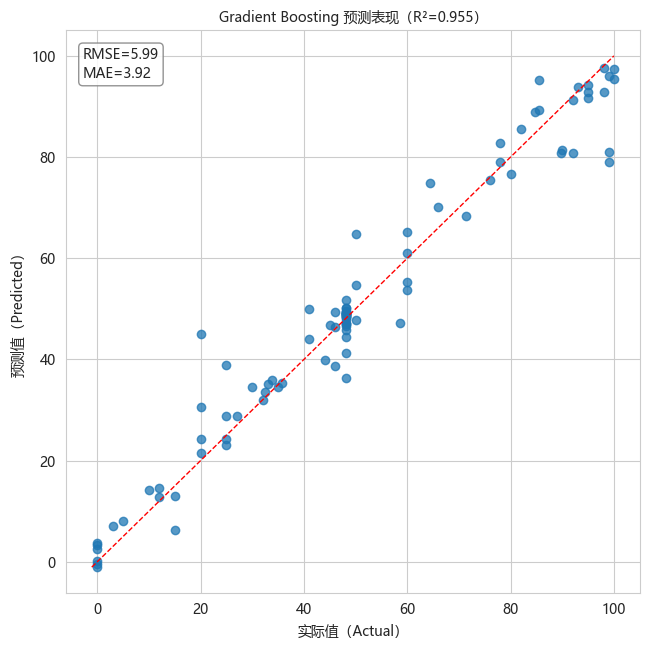

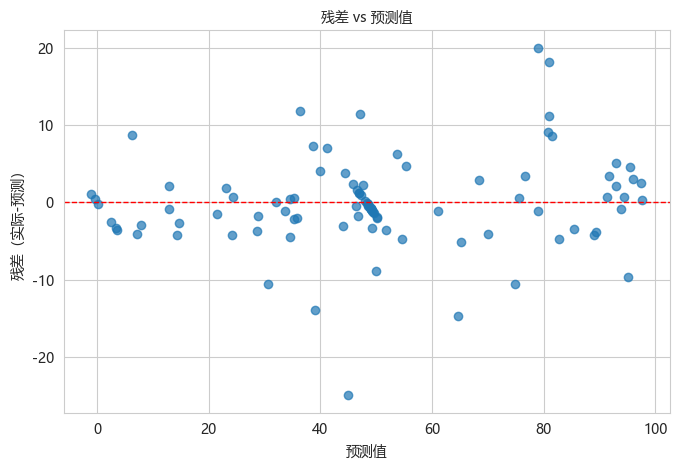

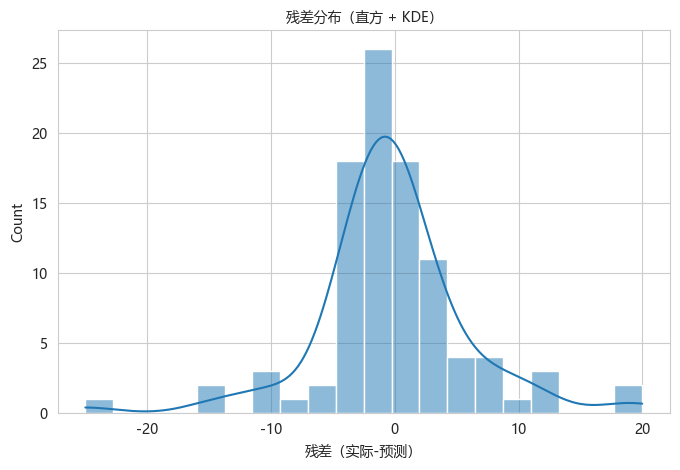

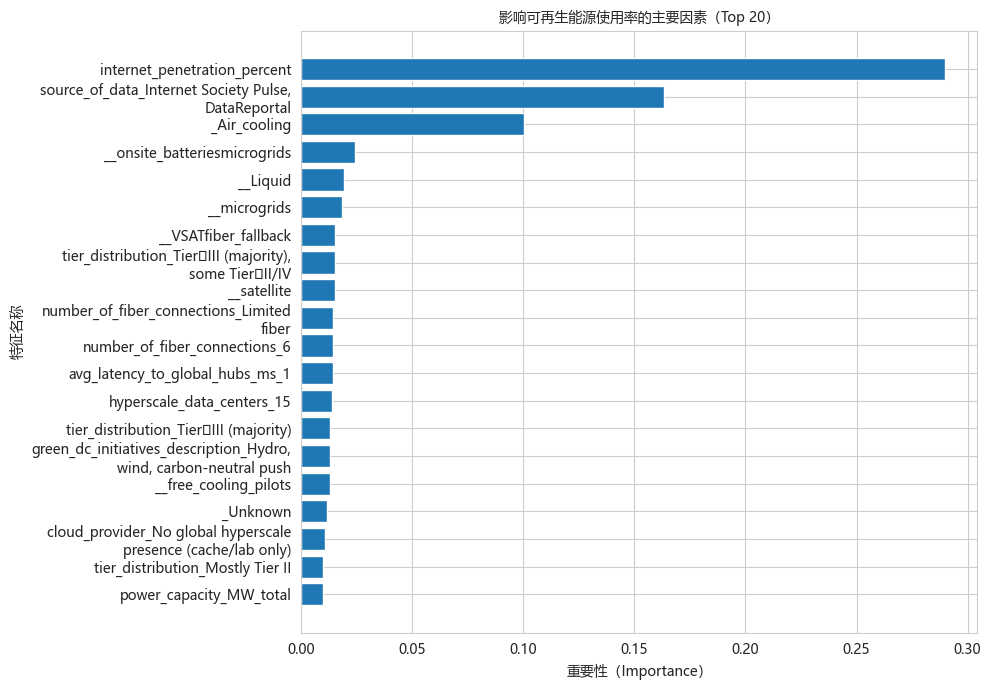

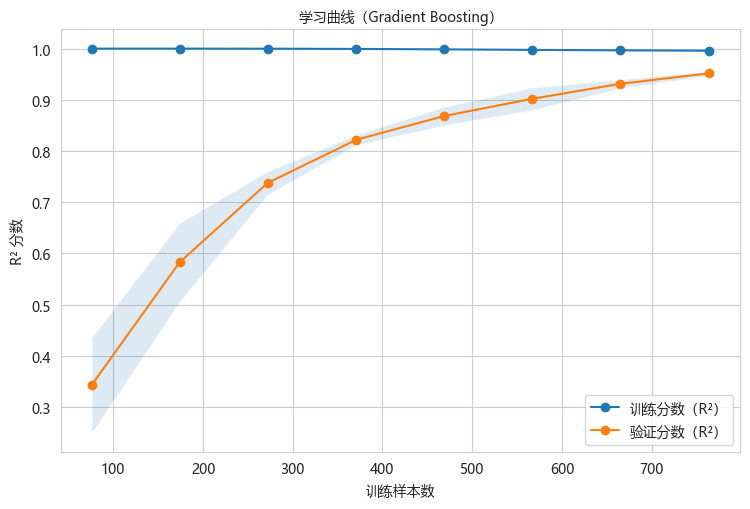

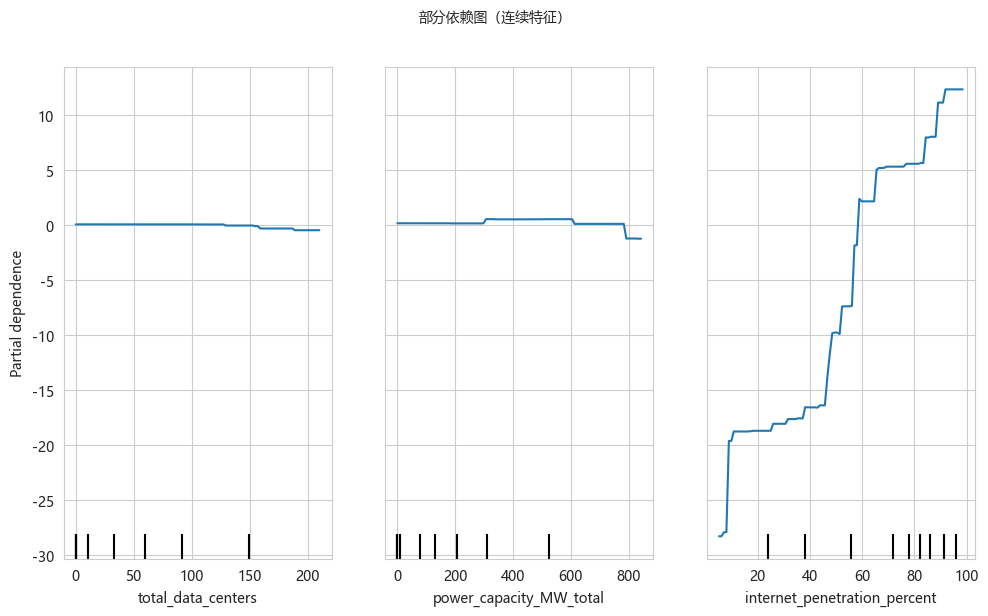

💾 已保存：GB_best_model.joblib, GB_metrics_90_10.csv, run_metadata.json 与 figs/*.png


'\n📊 指标解释：\n1) R²（判定系数）：范围 (-∞, 1]，越接近 1 越好，表示模型对目标波动的解释能力；\n   如 R²=0.95 表示可解释 95% 的变动。\n2) RMSE（均方根误差）：衡量平均偏差（对大误差更敏感），单位与目标一致；越小越好。\n3) MAE（平均绝对误差）：误差绝对值的平均值，对异常值不敏感；越小越好。\n'

In [5]:
# ============================================================
# 📘 国家/地区数据中心可再生能源使用率 —— 影响因素与预测（GBDT）
# 数据：Book1_5x_noise20-3.csv（5×扩增 + 20%噪声）
# 可视化：预测散点、残差图、误差分布、Top20重要性、学习曲线、(可选)PDP
# ============================================================

import os, json, time, textwrap, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# ========= 0) 中文字体强力修复（失败则英文降级，避免空白标题） =========
def ensure_cn_font():
    candidates = [
        ("Microsoft YaHei", r"C:\Windows\Fonts\msyh.ttc"),       # Windows
        ("SimHei",          r"C:\Windows\Fonts\simhei.ttf"),     # Windows
        ("Noto Sans CJK SC",r"C:\Windows\Fonts\NotoSansCJKsc-Regular.otf"),  # 可选
        ("PingFang SC",     r"/System/Library/Fonts/PingFang.ttc"),          # macOS
        ("Heiti SC",        r"/System/Library/Fonts/STHeiti Light.ttc"),     # macOS 旧
    ]
    installed = {f.name for f in fm.fontManager.ttflist}
    for name, path in candidates:
        try:
            if name in installed:
                plt.rcParams["font.sans-serif"] = [name]
                plt.rcParams["axes.unicode_minus"] = False
                print(f"✅ 使用字体：{name}")
                return fm.FontProperties(family=name)
            if os.path.exists(path):
                fm.fontManager.addfont(path)  # 动态注册
                plt.rcParams["font.sans-serif"] = [name]
                plt.rcParams["axes.unicode_minus"] = False
                print(f"✅ 通过路径加载字体：{name} -> {path}")
                return fm.FontProperties(fname=path)
        except Exception:
            pass
    print("⚠️ 未检测到中文字体，将用英文标题降级显示（建议安装微软雅黑/黑体/思源黑体）。")
    return None

CN_FONT = ensure_cn_font()
def CN(zh, en):
    """若有中文字体返回(中文, kwargs)，否则(英文, {})。"""
    return (zh, dict(fontproperties=CN_FONT)) if CN_FONT else (en, {})

# ============= 1) 读数与预处理 =============
DATA_PATH = "Book1_5x_noise20-3.csv"
TARGET = "average_renewable_energy_usage_percent"
RS = 42

df = pd.read_csv(DATA_PATH)
print(f"✅ 数据读取成功：{df.shape[0]} 行, {df.shape[1]} 列")

# 删除缺失率≥95%的列
missing_ratio = df.isna().mean()
drop_cols = missing_ratio[missing_ratio >= 0.95].index.tolist()
if drop_cols:
    df = df.drop(columns=drop_cols)
print(f"🧹 已删除缺失率≥95%的列：{len(drop_cols)}")

# 记录原始数值特征（用于后续 PDP 候选）
orig_numeric = [c for c in df.select_dtypes(include=[np.number]).columns if c != TARGET]

# One-Hot 编码对象列
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
if obj_cols:
    print(f"🔤 检测到非数值列 {len(obj_cols)} 个，将进行 One-Hot 编码：{obj_cols}")
    df = pd.get_dummies(df, columns=obj_cols, drop_first=True)

# 拆分 X/y + 数值化与缺失填补
if TARGET not in df.columns:
    raise ValueError(f"❌ 未找到目标列：{TARGET}")
y = pd.to_numeric(df[TARGET], errors="coerce").fillna(df[TARGET].median())
X = df.drop(columns=[TARGET]).apply(pd.to_numeric, errors="coerce")
X = X.fillna(X.median(numeric_only=True))

print(f"🎯 特征数量: {X.shape[1]} | 样本数量: {X.shape[0]}")

# ============= 2) 划分 90/10（保存索引以复现） =============
idx = np.arange(len(X))
train_idx, test_idx = train_test_split(idx, test_size=0.1, random_state=RS, shuffle=True)
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
np.savez("split_indices_90_10_rs42.npz", train_idx=train_idx, test_idx=test_idx)
print(f"📊 训练集: {X_train.shape[0]} | 测试集: {X_test.shape[0]}")

# ============= 3) 训练 Gradient Boosting =============
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=RS
)
print("\n🚀 正在训练 Gradient Boosting 模型...")
model.fit(X_train, y_train)

# ============= 4) 评估与保存指标 =============
y_pred = model.predict(X_test)
rmse = float(np.sqrt(mean_squared_error(y_test, y_pred)))
mae  = float(mean_absolute_error(y_test, y_pred))
r2   = float(r2_score(y_test, y_pred))

print("\n🏆 模型评估结果：")
print(f"R²（判定系数）: {r2:.3f}")
print(f"RMSE（均方根误差）: {rmse:.3f}")
print(f"MAE（平均绝对误差）: {mae:.3f}")

metrics_df = pd.DataFrame([{"Model":"Gradient Boosting","RMSE":rmse,"MAE":mae,"R2":r2}])
metrics_df.to_csv("GB_metrics_90_10.csv", index=False, encoding="utf-8-sig")

# ============= 5) 可视化（自动中文/英文标题） =============
os.makedirs("figs", exist_ok=True)

# 5.1 预测 vs 实际
plt.figure(figsize=(6.6,6.6))
plt.scatter(y_test, y_pred, alpha=0.75)
m, M = float(min(y_test.min(), y_pred.min())), float(max(y_test.max(), y_pred.max()))
plt.plot([m, M], [m, M], "r--", lw=1)

t, kw = CN(f"Gradient Boosting 预测表现（R²={r2:.3f}）", f"GB Prediction vs Actual (R2={r2:.3f})")
plt.title(t, **kw)
x, xkw = CN("实际值（Actual）", "Actual"); plt.xlabel(x, **xkw)
y_, ykw = CN("预测值（Predicted）", "Predicted"); plt.ylabel(y_, **ykw)

txt, akw = CN(f"RMSE={rmse:.2f}\nMAE={mae:.2f}", f"RMSE={rmse:.2f}\nMAE={mae:.2f}")
plt.annotate(txt, xy=(0.03, 0.97), xycoords="axes fraction",
             ha="left", va="top",
             bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.85),
             **akw)
plt.tight_layout(); plt.savefig("figs/01_pred_vs_actual.png", dpi=300); plt.show()

# 5.2 残差 vs 预测
residuals = y_test - y_pred
plt.figure(figsize=(6.9,4.8))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color="r", linestyle="--", lw=1)
t, kw = CN("残差 vs 预测值", "Residuals vs Predicted"); plt.title(t, **kw)
x, xkw = CN("预测值", "Predicted"); plt.xlabel(x, **xkw)
y_, ykw = CN("残差（实际-预测）", "Residual (Actual - Pred)"); plt.ylabel(y_, **ykw)
plt.tight_layout(); plt.savefig("figs/02_residuals_vs_pred.png", dpi=300); plt.show()

# 5.3 残差分布（直方 + KDE）
plt.figure(figsize=(6.9,4.8))
sns.histplot(residuals, bins=20, kde=True)
t, kw = CN("残差分布（直方 + KDE）", "Residuals Distribution (Hist + KDE)"); plt.title(t, **kw)
x, xkw = CN("残差（实际-预测）", "Residual"); plt.xlabel(x, **xkw)
plt.tight_layout(); plt.savefig("figs/03_residuals_hist.png", dpi=300); plt.show()

# 5.4 特征重要性 Top 20（长标签自动换行）
imp = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_}
                   ).sort_values("Importance", ascending=False).head(20)

def wrap(s, width=40):
    return "\n".join(textwrap.wrap(str(s), width=width))

imp_plot = imp.copy()
imp_plot["Feature_wrapped"] = imp_plot["Feature"].map(lambda s: wrap(s, 40))

plt.figure(figsize=(10, 7))
plt.barh(imp_plot["Feature_wrapped"][::-1], imp_plot["Importance"][::-1])
t, kw = CN("影响可再生能源使用率的主要因素（Top 20）", "Top-20 Feature Importance"); plt.title(t, **kw)
x, xkw = CN("重要性（Importance）", "Importance"); plt.xlabel(x, **xkw)
y_, ykw = CN("特征名称", "Feature"); plt.ylabel(y_, **ykw)
plt.tight_layout(); plt.savefig("figs/04_feature_importance_top20.png", dpi=300); plt.show()

# 5.5 学习曲线（样本量↑ → 训练/验证 R²）
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=RS)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 8),
    cv=cv, scoring="r2", shuffle=True, random_state=RS
)
plt.figure(figsize=(7.6,5.2))
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", label=CN("训练分数（R²）","Train R2")[0])
plt.plot(train_sizes, val_scores.mean(axis=1), "o-", label=CN("验证分数（R²）","Validation R2")[0])
plt.fill_between(train_sizes,
                 val_scores.mean(axis=1)-val_scores.std(axis=1),
                 val_scores.mean(axis=1)+val_scores.std(axis=1),
                 alpha=0.15)
t, kw = CN("学习曲线（Gradient Boosting）", "Learning Curve (GB)"); plt.title(t, **kw)
x, xkw = CN("训练样本数", "Training Examples"); plt.xlabel(x, **xkw)
y_, ykw = CN("R² 分数", "R2 Score"); plt.ylabel(y_, **ykw)
plt.legend()
plt.tight_layout(); plt.savefig("figs/05_learning_curve.png", dpi=300); plt.show()

# 5.6 （可选）PDP：从原始连续特征里挑 1~3 个仍存在于 X 的列
pdp_candidates = [c for c in orig_numeric if c in X.columns][:3]
try:
    if pdp_candidates:
        from sklearn.inspection import PartialDependenceDisplay
        fig, ax = plt.subplots(figsize=(10, 6))
        PartialDependenceDisplay.from_estimator(model, X_train, features=pdp_candidates, ax=ax)
        t, kw = CN("部分依赖图（连续特征）", "Partial Dependence (Continuous Features)")
        plt.suptitle(t, y=1.02, **kw)
        plt.tight_layout(); plt.savefig("figs/06_pdp.png", dpi=300); plt.show()
    else:
        print("ℹ️ 未找到适合的连续特征用于 PDP（多为 One-Hot 特征）。")
except Exception as e:
    print(f"ℹ️ 绘制 PDP 失败（可忽略）：{e}")

# ============= 6) 保存模型与元信息 =============
dump(model, "GB_best_model.joblib")
meta = {
    "dataset": DATA_PATH,
    "samples": int(len(X)), "features": int(X.shape[1]),
    "split": "90/10", "random_state": RS,
    "R2": round(r2,3), "RMSE": round(rmse,3), "MAE": round(mae,3),
    "figs": [
        "figs/01_pred_vs_actual.png",
        "figs/02_residuals_vs_pred.png",
        "figs/03_residuals_hist.png",
        "figs/04_feature_importance_top20.png",
        "figs/05_learning_curve.png",
        "figs/06_pdp.png"
    ],
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
}
with open("run_metadata.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print("💾 已保存：GB_best_model.joblib, GB_metrics_90_10.csv, run_metadata.json 与 figs/*.png")

# ============= 7) 指标解释（报告可直接引用） =============
"""
📊 指标解释：
1) R²（判定系数）：范围 (-∞, 1]，越接近 1 越好，表示模型对目标波动的解释能力；
   如 R²=0.95 表示可解释 95% 的变动。
2) RMSE（均方根误差）：衡量平均偏差（对大误差更敏感），单位与目标一致；越小越好。
3) MAE（平均绝对误差）：误差绝对值的平均值，对异常值不敏感；越小越好。
"""
